# Import packages

In [1]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

# Custom functions

In [67]:
def generate_sample(mean, std, n):
    return np.random.normal(loc=mean, scale=std, size=int(n))

In [68]:
def critical_value(significance_level, n):
    return scipy.stats.t.ppf(q=1-significance_level, df=n-1)

In [69]:
def mde(alpha, power, n, variance, p):
    """
    Calculated Minimum Detectable Effect
    """
    return (critical_value(power, n) + critical_value(alpha/2, n)) * np.sqrt(variance / (n * p * (1 - p)))

In [70]:
def standard_error(variance_1, variance_2, n_1, n_2):
    return np.sqrt(variance_1/n_1 + variance_2/n_2)

In [73]:
def sample_test_reject_yn(n, p, b_control_true, b_treatment_true, variance, alpha):
    # Generate observations
    n_1 = int(n * p)
    n_2 = n - n_1
    control_x = generate_sample(b_control_true, np.sqrt(variance), n_1)
    treatment_x = generate_sample(b_treatment_true, np.sqrt(variance), n_2)

    # Get critical value
    critical_val = critical_value(alpha, min(n_1, n_2))

    # Get test statistic
    test_statistic = (np.mean(treatment_x) - np.mean(control_x)) / standard_error(np.var(control_x), np.var(treatment_x), n_1, n_2)

    return test_statistic > critical_val

In [74]:
def experiment(n, b, p, b_control_true, b_treatment_true, variance, alpha):
    results = []
    for i in range(b):
        res = sample_test_reject_yn(n, p, b_control_true, b_treatment_true, variance, alpha)
        results.append(res)

    return np.array(results).astype(int)

# Parameters

In [75]:
n = 1000
b = 100
p = 0.1
b_control_true = 0
b_treatment_true = 1
variance = 1
alpha = 0.05
power = 0.8

# Experiment

Our hypothesis testing looks the following:
$$
H_0: \beta_{treatment} - \beta_{control} <= 0
$$

$$
H_1: \beta_{treatment} - \beta_{control} > 0
$$

## Calculate expected MDE

In [76]:
expected_mde = mde(alpha, power, n, variance, p)
print(expected_mde)

0.1180963427074951


## Run the experiment

In [84]:
treatment_betas = np.arange(0, 1, 0.1)


In [85]:
experiment_results = []
for treatment_beta in treatment_betas:
    results = experiment(n, b, p, b_control_true, treatment_beta, variance, alpha)
    experiment_results.append(np.mean(results))


## Visualize results

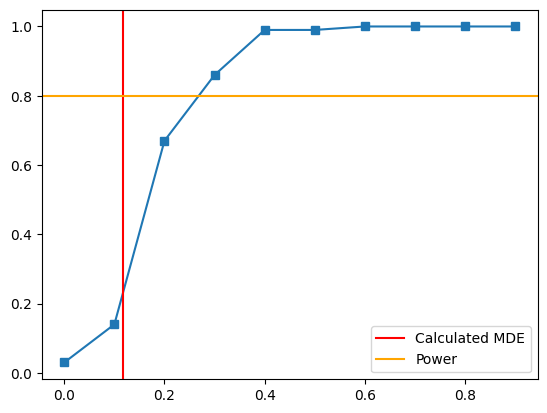

In [86]:
plt.plot(treatment_betas, experiment_results, marker="s")
plt.axvline(expected_mde, label="Calculated MDE", color="red")
plt.axhline(power, label="Power", color="orange")

plt.legend(loc='lower right')
plt.show()

This suggests that something is wrong with my calculation (theoretically the curve should cross at the intersection of *power* and *MDE*!

# Support

In [ ]:
sample_test_reject_yn(n, p, b_control_true, b_treatment_true, variance, alpha)

True

In [ ]:
critical_value(0.025, 1000)

1.9623414611334487

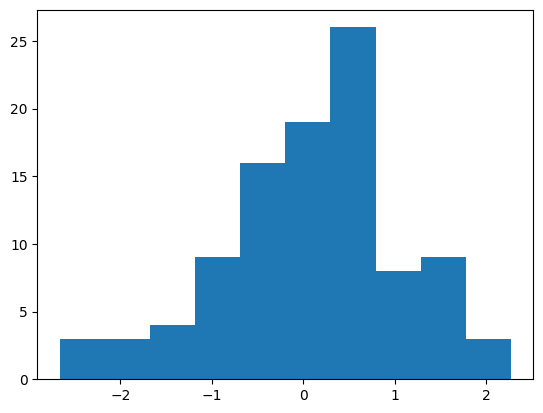

In [ ]:
x = generate_sample(b_control_true, np.sqrt(variance), n * p)
plt.hist(x)
plt.show()

In [ ]:
results = experiment(n, b, p, b_control_true, b_treatment_true, variance, alpha)

In [ ]:
np.mean(results)